In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:
import elastic
import constants
import potentials
import numpy as np
import pylab as plt



In [3]:
bigrhos=np.linspace(20,50,10)/constants.hcInEVAngstrom

In [4]:
r0       = 1e-9
pin      = 1e-4
intlimit = 100 * constants.BohrInAng/constants.hcInEVAngstrom
rhos = np.linspace(r0, intlimit, 100)

aT=elastic.GetScatteringLength(rhos, pin, 0, constants.muT, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom
aH=elastic.GetScatteringLength(rhos, pin, 0, constants.muH, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom

sigT=elastic.GetCrossSection(rhos, pin, 0, constants.muT, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom**2*1e-20
sigH=elastic.GetCrossSection(rhos, pin, 0, constants.muH, potentials.Silvera_Triplet, 'Radau')*constants.hcInEVAngstrom**2*1e-20

In [5]:
print("T s-wave triplet scattering length in pm: " + str(aT[-1]))
print("H s-wave triplet scattering length in pm: " + str(aH[-1]))

print("T s-wave triplet cross section in m^2: " + str(sigT[-1]))
print("H s-wave triplet cross section in m^2: " + str(sigH[-1]))

T s-wave triplet scattering length in pm: -41.849236929807276
H s-wave triplet scattering length in pm: 0.7119145922352029
T s-wave triplet cross section in m^2: 4.4016443286864636e-16
H s-wave triplet cross section in m^2: 1.2737835892279595e-19


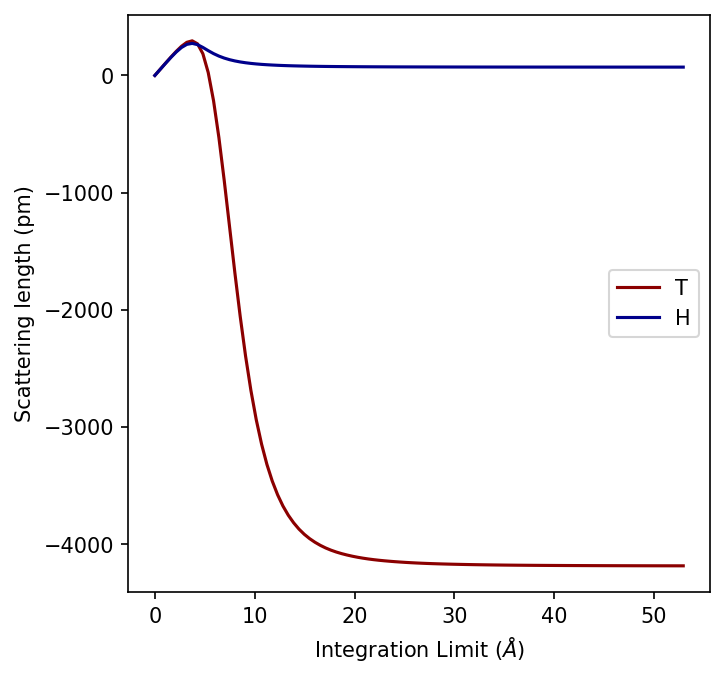

In [6]:
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel(r"Integration Limit ($\AA$)")
plt.ylabel("Scattering length (pm)")
plt.plot(rhos*constants.hcInEVAngstrom,aT*100,label='T',color='DarkRed')
plt.plot(rhos*constants.hcInEVAngstrom,aH*100,label='H',color='DarkBlue')
plt.legend(loc='center right')
